In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from glob import glob
import os

h_files = sorted(glob(f'{os.getcwd()}/checkpoints/*/history.json'))

In [2]:
hs = []
for hf in h_files:
    with open(hf) as f:
        hs.append(json.load(f))

8: {'dropout': 0.31096846185725785, 'optim': 'adamw'}, epochs: 94
	loss: 0.976, accuracy: 0.729, val_accuracy: 0.885, f1_score: 0.728, val_f1_score: 0.881
9: {'dropout': 0.3680187201216583, 'optim': 'adamw'}, epochs: 118
	loss: 1.089, accuracy: 0.700, val_accuracy: 0.878, f1_score: 0.698, val_f1_score: 0.873
4: {'dropout': 0.40450342882791057, 'optim': 'adamw'}, epochs: 125
	loss: 1.227, accuracy: 0.660, val_accuracy: 0.879, f1_score: 0.658, val_f1_score: 0.874
12: {'dropout': 0.42704953193709455, 'optim': 'adamw'}, epochs: 83
	loss: 2.017, accuracy: 0.482, val_accuracy: 0.822, f1_score: 0.477, val_f1_score: 0.812
1: {'dropout': 0.3907050856575669, 'optim': 'sgd'}, epochs: 66
	loss: 5.079, accuracy: 0.038, val_accuracy: 0.162, f1_score: 0.030, val_f1_score: 0.098
10: {'dropout': 0.4369450505655366, 'optim': 'sgd'}, epochs: 96
	loss: 5.398, accuracy: 0.039, val_accuracy: 0.166, f1_score: 0.028, val_f1_score: 0.106
2: {'dropout': 0.3620743406286583, 'optim': 'sgd'}, epochs: 58
	loss: 5.6

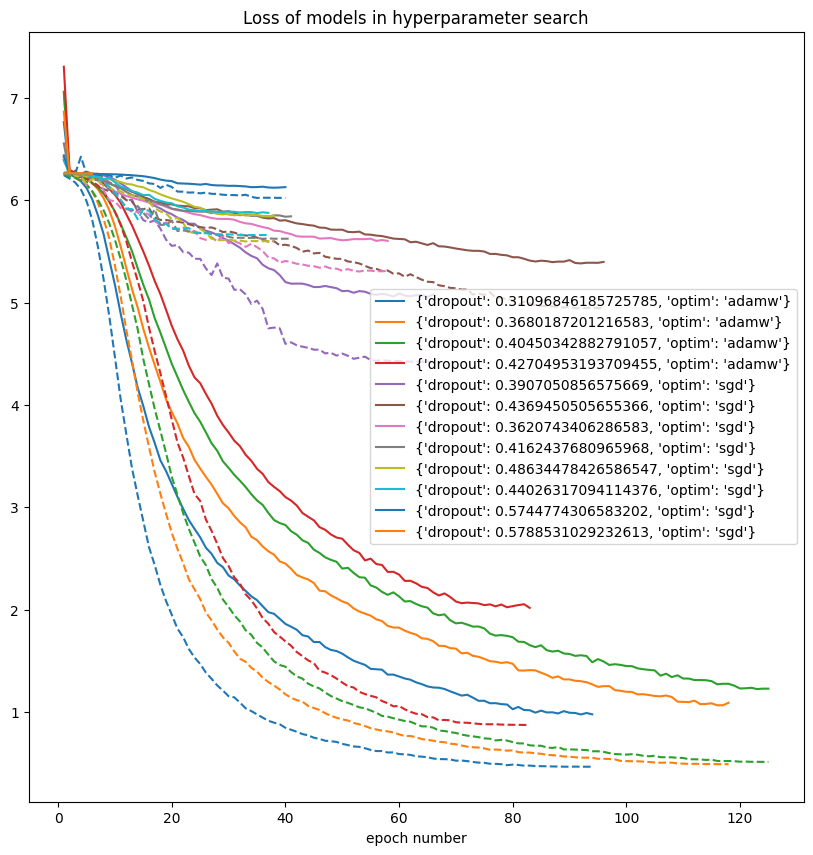

In [3]:
plt.figure(figsize=(10,10))

for i, h in enumerate(sorted(hs, key=lambda h: h['loss'][-1])):
    print(f'{h["iteration"]}: {h["params"]}, epochs: {h["epochs"]}')
    print('\t' + ', '.join(f'{name}: {h[name][-1]:.3f}' for name in ['loss', 'accuracy', 'val_accuracy', 'f1_score', 'val_f1_score']))
    l, = plt.plot(range(1, h['epochs']+1), h['loss'], label=str(h['params']))
    plt.plot(range(1, h['epochs']+1), h['val_loss'], color=l.get_color(), linestyle='--')

plt.legend()
plt.xlabel('epoch number')
plt.title('Loss of models in hyperparameter search');

Solid lines are training loss. Dashed lines are validation loss for trainings of like color.

In [4]:
import tensorflow as tf

RAW_IMAGE_HEIGHT = 224
RAW_IMAGE_WIDTH = 224
RAW_IMAGE_CHANNELS = 3

BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
BATCH_SIZE = 256

dataset_valid = tf.keras.utils.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'valid'),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    image_size=(RAW_IMAGE_HEIGHT, RAW_IMAGE_WIDTH),
    crop_to_aspect_ratio=True
)

model = tf.keras.models.load_model('model')
model.trainable = False
model.evaluate(dataset_valid)

2023-10-25 15:03:59.054359: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 15:03:59.271077: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 15:03:59.272345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 15:04:00.502736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 2626 files belonging to 525 classes.


2023-10-25 15:04:13.062009: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2023-10-25 15:04:13.405761: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 155520000 exceeds 10% of free system memory.
2023-10-25 15:04:13.514401: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2023-10-25 15:04:13.570918: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-25 15:04:14.136541: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


11/11 [==============================] - 118s 10s/step - loss: 0.4639 - accuracy: 0.8865 - f1_score: 0.8831


[0.4638686776161194, 0.8865194320678711, 0.883053183555603]

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling_1[0][0]']         
 on)                                                                                              
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   